# 08-01 합성곱과 풀링(Convolution and Pooling)

Convolutional Neural Network(합성곱 신경망): 합성곱층(Convolution layer)와 풀링층(Pooling layer)로 구성됨
- Convolution layer: 합성곱 연산 + 활성화함수
- Pooling layer: 풀링 연산

## 1. 합성곱 신경망의 대두

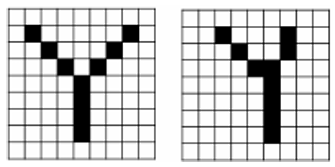

위와 같이 이미지에 조금만 변형이 가해져도, 기계가 보기에는 각 픽셀마다 가진 값이 거의 다르므로, 완전히 다른 값을 가진 입력임.

- 이미지는 위와 같이 같은 대상이라도 휘어지거나, 이동되었거나, 방향이 뒤틀렸거나 등 다양한 변형이 존재함.

즉, 다층 퍼셉트론은 몇가지 픽셀만 값이 달라져도 민감하게 예측에 영향을 받는다는 단점이 있다.


***구체적 예시***


위의 손글씨를 다층 퍼셉트론으로 분류한다고 하면, 아래와 같이 이미지를 1차원 텐서인 벡터로 변환하고, 다층 퍼셉트론의 입력층으로 사용해야함.

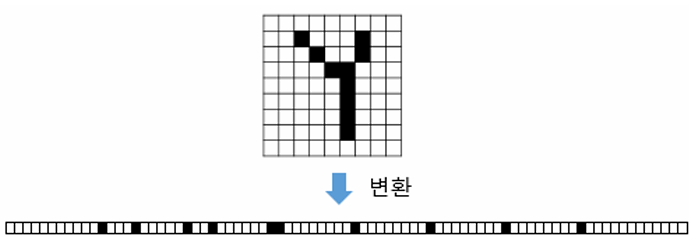

즉, 위의 결과는 변환 전에 가지고 있던 spatial[스페이셜] structure(공간적인 구조) 정보가 유실된 상태
- spatial structure: 공간적인 구조 정보는 거리가 가까운 픽셀들끼리는 어떤 연관이 있고, 어떤 픽셀들끼리 값이 비슷한지 등의 정보를 포함할 것.
- 결국 이미지의 spatial structure를 보존하면서 학습할 수 있는 방법이 필요해졌고, 이를 위해 Convolutional Neural Network(합성곱 신경망)를 사용함

## 2. 채널(Channel)

기계는 글자나 이미지보다 텐서(숫자)를 더 잘 처리할 수 있음.

이미지는 **(높이, 너비, 채널)**이라는 3차원의 텐서임.
- 높이: 이미지의 세로방향 픽셀 수
- 너비: 이미지의 가로방향 픽셀 수
- 채널: 색 성분
    - 흑백 이미지의 채널 수는 1
- 각 픽셀은 0~255의 값을 가짐

***이미지 데이터의 예시***

**28x28(높이 x 너비) 픽셀의 흑백 이미지(채널 수 = 1)**

즉, 아래의 이미지는 (28 x 28 x 1)의 크기를 가지는 3차원 텐서

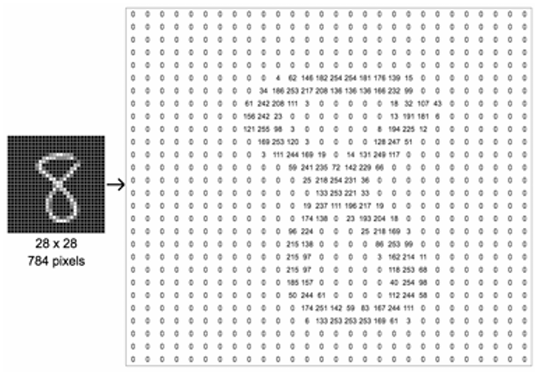

**28x28 픽셀의 컬러 이미지**

하나의 픽셀은 3가지 색깔인 삼원색의 조합으로 이루어짐(RGB)

즉,아래와 같은 높이가 28, 너비가 28인 컬러이미지가 있다면 이 이미지의 텐서는 (28 x 28 x 3)의 크기를 가지는 3차원 텐서

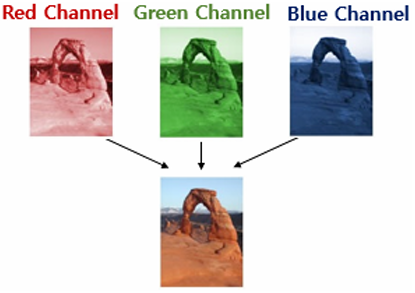

채널 == 깊이(depth)이기도 함
- depth라는 용어를 사용할 경우 이미지는 (높이, 너비, 깊이)라는 3차원 텐서로 표현된다고 말할 수 있음

## 3. 합성곱 연산(Convolution operation)

Convolution layer의 역할: 합성곱 연산을 통해서 이미지의 특징(feature)을 추출하는 역할

합성곱 연산(convolution 연산): 커널(kernel) 또는 필터(filter)라는 $n\times m$ 크기의 행렬로 (높이 x 너비) 크기의 이미지를 처음부터 끝까지 겹치며 훑으면서 이미지의 원소 중 $n \times m$의 필터와 겹쳐지는 부분을 커널의 원소의 값과 element-wise로 곱해서 모두 더한 값을 출력으로 하는 것
- 이미지의 가장 왼쪽 위부터 가장 오른쪽 아래까지 순차적으로 훑는다.
- 커널(kernel)은 일반적으로 3x3 또는 5x5를 사용한다.

***Example: 3x3 커널로 5x5 이미지 행렬에 합성곱 연산 수행하기***

한번의 연산을 1 스텝(step)이라고 하자.
합성곱 연산의 4번째 스텝까지의 이미지와 식을 표현하였다.

### 1) 1 step

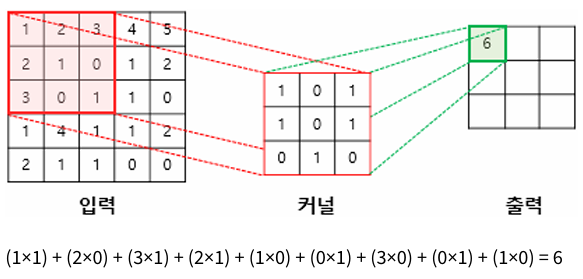

### 2) 2 step

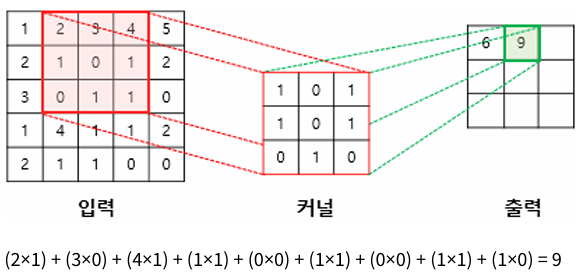

### 3) 3 step

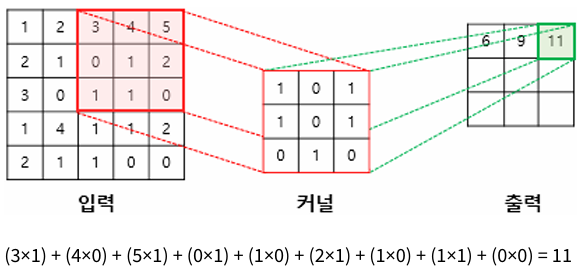

### 4) 4 step

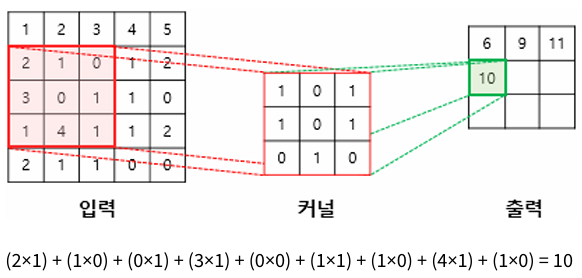

위의 연산을 총 9번의 스텝까지 마쳤다고 하면, 최종결과는 아래와 같다.

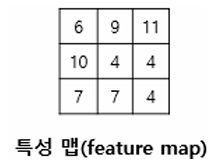

**특성 맵(feature map)**: (입력으로부터 커널을 사용하여) 합성곱 연산을 통해 나온 결과

<br>


커널의 크기는 사용자가 정할 수 있다.

위에서 커널의 이동범위는 1칸이었지만, 이동범위도 사용자가 정할 수 있다.
- 이러한 이동범위를 **스트라이드(stride)**라고 함


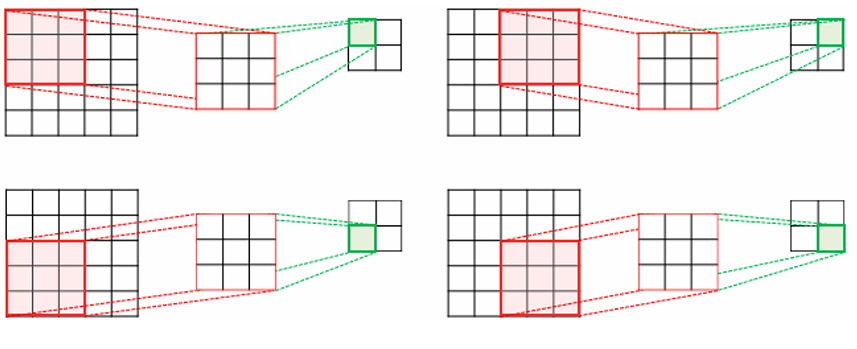

위의 예제는 **스트라이드가 2일 경우**, 5x5 이미지에 합성곱 연산을 수행하는 3x3 커널의 움직임을 보여줌.

-> 최종적으로 2x2 크기의 feature map을 얻음

## 4. 패딩(Padding)

합성곱 연산의 결과로 얻은 특성 맵은 입력보다 크기가 작아진다는 특징이 존재함.
- 5x5 이미지에 3x3 커널로 합성곱 연산을 할때, 스트라이드가 1이라면 3x3 특성맵이 나옴
- 즉, 합성곱 층을 여러개 쌓았다면 최종적으로 나온 특성 맵은 초기 입력보다 매우 작아진 상태가 됨.

합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하고 싶다면 **패딩**을 사용

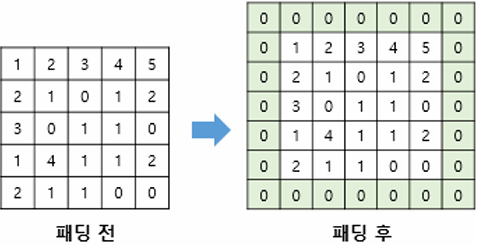

<5x5 이미지에 폭 1짜리 제로 패딩을 사용함.>

패딩(padding): (합성곱 연산을 하기 전에) 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가해주는 것
- 즉, 지정된 개수의 폭만큼 테두리를 추가하는 작업
- 주로 값을 0으로 채우는 제로 패딩(zero padding)을 사용함.

커널을 주로 3x3 또는 5x5를 사용
- 만약 스트라이드가 1일경우 아래와 같이 패딩을 지정하면 **입력과 특성맵의 크기를 보존 가능**
    - 3x3 크기의 커널을 사용시 -> 1폭짜리 제로 패딩을 사용
        - ex. 5x5 크기 이미지에 1폭짜리 제로 패딩시 7x7 이미지가 됨.
        - 여기에 3x3 커널을 사용하여 1스트라이드로 합성곱 연산을 한 후의 특성맵은 기존의 입력이미지의 크기와 같은 5x5가 됨

    - 5x5 크기의 커널을 사용시 -> 2폭짜리 제로 패딩을 사용


## 5. 가중치와 편향

합성곱 신경망에서의 가중치와 편향을 이해하기 위해 다층 퍼셉트론을 복습해보자.

### 1) 합성곱 신경망의 가중치

***다층퍼셉트론***

다층퍼셉트론으로 3x3 이미지를 처리한다고 가정.

이미지를 1차원 텐서인 벡터로 만들면,입력층은 9개(3x3)의 뉴런을 가진다.

여기에 4개의 뉴런을 가지는 은닉층을 추가한다고 하면 아래와 같이 나타난다.

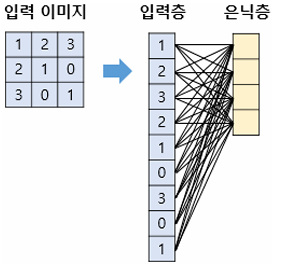

각 연결선 == 가중치
- 9x4 = 36개의 가중치를 가진다.

***합성곱 신경망***

합성곱 신경망으로 3x3 이미지를 처리한다고 해보자.

2x2 커널을 사용하고, 스트라이드는 1로 한다.(*는 합성곱 연산을 의미함.)

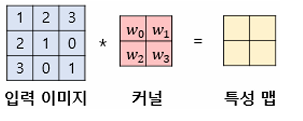

합성곱 신경망에서 가중치: **커널 행렬의 원소들**

이를 인공신경망(다층 퍼셉트론)의 형태로 나타내면 아래와 같이 표현할 수 있다.

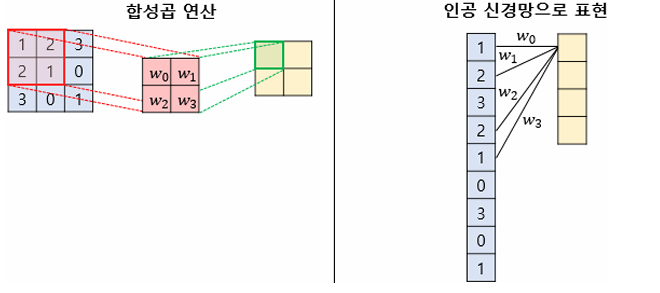

최종적으로 특성맵을 얻기 위해서는 동일한 커널로 이미지 전체를 훑으며 합성곱 연산을 진행한다.
- 이미지 전체를 훑으며 사용되는 가중치는 $w_0,w_1,w_2,w_3$로 4개뿐.
- 각 합성곱 연산마다 이미지의 모든 픽셀을 사용하는 것이 아니라, 커**널과 맵핑되는 픽셀만을 입력으로 사용**

즉 합성곱 신경망은 다층 퍼셉트론을 사용할 때보다 **훨씬 더 적은 수의 가중치를 사용**하며, spatial structure(공간적 구조) 정보를 보존한다는 특징이 있다.

<br>

***활성화함수***

다층 퍼셉트론의 은닉층: 가중치 연산 후 비선형성을 추가하기 위해 활성화 함수 통과
합성곱 신경망의 은닉층: 합성곱 연산 후 얻은 특성맵에 비선형성 추가를 위해 활성화 함수 통과
- ReLU함수나 ReLU함수의 변형들이 주로 사용됨.(gradient vanishing문제 해결)

합성곱층(convolution layer): 합성곱 신경망에서 **합성곱 연산을 통해서 특성맵을 얻고, 활성화함수를 지나는 연산을 하는 합성곱 신경망의 은닉층**

### 2) 합성곱 신경망의 편향


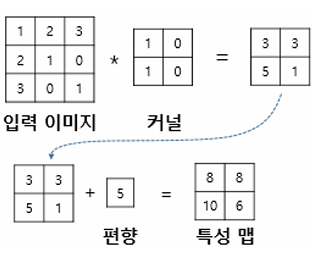

합성곱 신경망에도 편향(bias)을 추가할 수 있다.
- 편향은 커널을 적용한 뒤에 더해짐.
- 편향은 하나의 값만 존재하며, 커널이 적용된 결과의 모든 원소에 더해짐

## 6. 특성맵의 크기 계산 방법
입력의 크기, 커널의 크기, 스트라이드 값을 알면 합성곱 연산의 결과인 특성맵의 크기를 계산 가능
- $I_h$: 입력의 높이
- $I_w$: 입력의 너비
- $K_h$: 커널의 높이
- $K_w$: 커널의 너비
- $S$: 스트라이드
- $O_h$: 특성맵의 높이
- $O_w$: 특성맵의 너비

<br>

특성맵의 높이와 너비는 아래와 같다.

$floor$ 함수: 소수점 발생시 소수점 이하를 버리는 역할


$$O_h = floor(\frac{I_h-k_h}{S}+1)$$

$$O_w = floor(\frac{I_w-k_w}{S}+1)$$


<br>

***Example***

ex. 5x5 크기 이미지에 3x3 커널을 사용하고 스트라이드 1로 합성곱 연산을 진행
- 특성맵의 크기 = ((5-3)/1 + 1) x ((5-3)/1 + 1) = 3x3
- 또한, 총 9번의 step이 필요함을 의미하기도 함
    - 이 9개의 값은, 필터가 입력 이미지의 서로 다른 9개 위치에서 합성곱 연산을 수행해서 나온 결과임.
    - 즉, 필터가 총 9번 이동하면서 스텝을 밟았다는 뜻

<br>

***패딩을 고려한 식***

$$O_h = floor(\frac{I_h-k_h + 2P}{S}+1)$$

$$O_w = floor(\frac{I_w-k_w + 2P}{S}+1)$$

## 7. 다수의 채널을 가질 경우의 합성곱 연산(3차원 텐서의 합성곱 연산)

> 지금까지는 채널(channel) 또는 깊이(depth)를 고려하지 않고, 2차원 텐서를 가정하여 설명함.

실제로 합성곱 연산의 입력은 '다수의 채널을 가진' 이미지 또는 이전 연산의 결과로 나온 '다수의 채널을 가진' 특성맵일 수도 있다.
- 다수의 채널을 가진 입력 데이터로 합성곱 연산을 한다면, 커널의 채널수도 입력의 채널 수만큼 존재해야한다.
- 즉, **입력 데이터의 채널 수와 커널의 채널 수는 같아야한다.**
- 채널 수가 같으므로, 합성곱 연산을 채널마다 수행하고, 그 결과를 모두 더해서 최종 특성맵을 얻는 것이다.

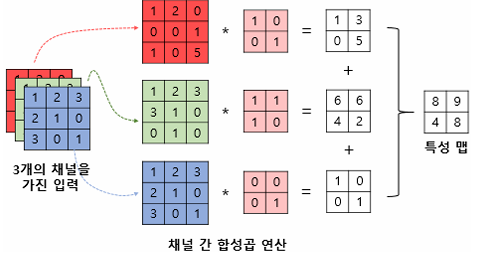

<3개의 채널을 가진 입력 데이터와 3개의 채널을 가진 커널의 합성곱 연산>

채널 간 합성곱 연산을 마치고, 그 결과를 모두 더해서 하나의 채널을 가지는 특성맵을 만들고 있다.
- 커널의 각 채널끼리의 크기는 같아야한다.


주의해야할점은, 위의 연산에서 사용되는 커널을 3개의 커널이 아니라 3개의 채널을 가진 1개의 커널이라는 점이다.




위 사진은 높이 3, 너비 3, 채널 3의 입력이 높이 2, 너비 2, 채널 3의 커널과 합성곱 연산을 하여 높이 2, 너비 2, 채널 1의 특성맵을 얻는다.
- 합성곱 연산의 결과로 얻은 특성맵의 채널 차원은 RGB 채널등과 같은 컬러의 의미를 담고있지는 않는다.

## 8. 3차원 텐서의 합성곱 연산

***일반화를 위해 사용하는 변수의 의미***

- $I_h$: 입력의 높이
- $I_w$: 입력의 너비
- $K_h$: 커널의 높이
- $K_w$: 커널의 너비
- $S$: 스트라이드
- $O_h$: 특성맵의 높이
- $O_w$: 특성맵의 너비
- $C_i$: 입력 데이터의 채널

***3차원 텐서의 합성곱 연산***

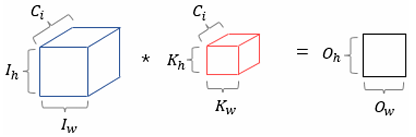

높이 $I_h$, 너비 $I_w$, 채널 $C_i$의 입력데이터가

높이 $K_h$, 너비 $K_w$, 채널 $C_i$의 커널과 합성곱 연산을 하여

높이 $O_h$, 너비 $O_w$, 채널 1의 특성 맵을 얻는다.


***하나의 입력에 다수의 커널을 사용하는 합성곱 연산***

하나의 입력에 여러개의 커널을 사용하는 합성곱 연산을 할수도 있다.

$C_0$: 합성곱 연산에 사용하는 커널의 수

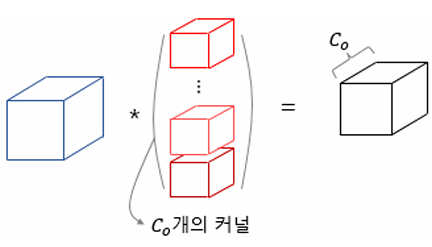

<합성곱 연산에서 다수의 커널을 사용할 경우의 연산 과정>

합성곱 연산에서 다수의 커널을 사용할 경우,
- **사용한 커널수**는 **합성곱 연산의 결과로 나오는 특성맵의 채널 수**이다.

**가중치 매개변수의 개수**
커널의 크기와 입력 데이터의 채널 수 $C_i$, 특성맵(출력 데이터)의 채널 수 $C_0$가 주어졌다면, 가중치 매개변수의 총 개수를 구할 수 있다.
- 하나의 커널의 하나의 채널이 가지는 가중치: $K_h \times K_w$
- 합성곱 연산을 할 때 커널이 입력데이터의 채널수와 동일한 채널 수를 가져야함
    - 즉, 하나의 커널이 가지는 매개변수의 수는 $K_h \times K_w \times C_i$
- 이러한 커널이 총 $C_0$개 존재.
- 따라서 가중치 매개변수의 총 수 : $K_h \times K_w \times C_i \times C_0$

## 9. 풀링(Pooling)

합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적.

풀링층: 특성맵을 다운샘플링하여 특성맵의 크기를 줄이는 풀링 연산을 수행함.
- 일반적으로 최대 풀링과 평균 풀링이 사용됨.

> 풀링 연산에서도 합성곱 연산과 마찬가지로 커널과 스트라이드의 개념을 가짐

***최대 풀링(max pooling)***

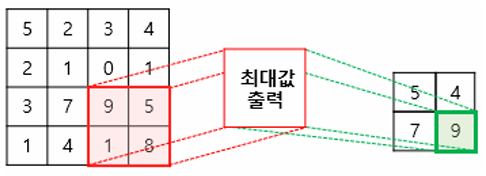

<스트라이드가 2일때, 2x2크기의 커널로 max pooling 연산을 하는 과정>

max pooling: 커널과 겹치는 영역안에서 최대값을 추출하는 방식으로 다운 샘플링함.
- 위의 사진에서는 특성맵이 max pooling을 통해 절반의 크기로 다운샘플링 되는 것을 확인 가능

<br>

***평균 풀링(average pooling)***

평균 풀링: 최대값을 추출하는 것이 아니라 평균값을 추출하는 연산

<br>

***합성곱 연산과 풀링 연산의 비교***

공통점: 풀링 연산은 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사함

차이점: 풀링 연산은 학습해야할 가중치가 없으며, 연산 후에 채널 수가 변하지 않음.

# 08-02 CNN으로 MNIST 분류하기

## 1. 모델 이해하기

### 1) 첫번째 표기방법
합성곱(nn.Conv2d) + 활성화함수(nn.ReLU)를 하나의 합성곱 층으로 보고, 맥스풀링(nn.MaxPool2d)은 풀링층으로 별도로 명명함.


### 2) 두번째 표기방법
합성곱(nn.Conv2d) + 활성화함수(nn.ReLU) + 맥스풀링(nn.MaxPool2d)을 하나의 합성곱 층으로 봄

> 즉, 풀링도 하나의 층으로 보냐, 안보냐의 문제인데, 이번 챕터에서는 편의를 위해 맥스풀링까지도 포함해서 하나의 합성곱층으로 판단하는 2번째 표기방법을 채택

***모델의 아키텍처***

모델의 아키텍처는 총 3개의 층으로 구성된다.

```python
# 1번 레이어: 합성곱층(Convolutional Layer)
합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화함수 ReLU + 맥스풀링(kernel_size=2, stride=2)

# 2번 레이어: 합성곱층(Convolutional Layer)
합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1)
+ 활성화 함수 ReLU + 맥스풀링(kernel_size=2, stride=2)

#3번 레이어: 전결합층(Fully-Connected Layer)
특성맵을 펼친다. # batch_size x 7 x 7 x 64 -> batch_size x 3136
전결합층(뉴런 10개) + 활성화함수 Softmax
```

## 2. 모델 구현하기

### 1) 필요한 도구 임포트와 입력의 정의

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# 배치 크기 x 채널 x 높이(height) x 너비(width)의 크기의 텐서를 선언
inputs = torch.Tensor(1, 1, 28, 28)
print('텐서의 크기 : {}'.format(inputs.shape))

텐서의 크기 : torch.Size([1, 1, 28, 28])


### 2) 합성곱층과 풀링 선언하기

In [ ]:
# 첫번째 합성곱층
conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
pool = nn.MaxPool2d(2)  # 정수 하나를 인자로 넣으면 커널 사이즈와 스트라이드가 둘 다 해당 값으로 지정됨
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


### 3) 구현체를 연결하여 모델 만들기

In [ ]:
out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [ ]:
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [ ]:
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [ ]:
out = pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [ ]:
out.size(0) # out의 1번째 차원 출력

1

In [ ]:
out.size(1) # out의 2번째 차원 출력

64

In [ ]:
out.size(2) # out의 3번째 차원 출력

7

In [ ]:
out.size(3) # out의 4번째 차원 출력

7

In [ ]:
# 첫번째 차원인 배치 차원은 그대로 두고 나머지는 펼쳐라
out = out.view(out.size(0), -1)
print(out.shape)

torch.Size([1, 3136])


In [ ]:
fc = nn.Linear(3136, 10)    # input_dim=3136, output_dim = 10
out = fc(out)
print(out.shape)

torch.Size([1, 10])


## 3. CNN으로 MNIST 분류하기

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# 학습에 사용할 파라미터 설정
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/',   # 다운로드 경로 지정
                          train=True,   # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(),   # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',    # 다운로드 경로 지정
                         train=False,   # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(),   # 텐서로 변환
                         download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.40MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.73MB/s]


In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째 층
        # ImgIn shape=(?, 28. 28. 1)
        #   Conv    -> (?, 28, 28. 32)
        #   Pool    -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # 두번째 층
        # ImgIn shape=(?, 14, 14, 32)
        #   Conv    -> (?, 14, 14, 64)
        #   Pool    -> (?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # 전결합층 7 x 7 x 64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7*7*64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1) # 전결합층을 위해서 Flatten(배치차원만 남기고)
        out = self.fc(out)
        return out

In [ ]:
# CNN 모델 정의
model = CNN().to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)  # 비용함수에 소프트맥스 함수 포함되어져 있음
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 총 배치 수 출력
total_batch = len(data_loader)
print('총 배치의 수: {}'.format(total_batch))   # 배치크기가 100이므로, 훈련 데이터는 총 6만개

총 배치의 수: 600


In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0    # 에포크당 평균 비용을 저장하기 위한 변수 초기화

    for X, Y in data_loader:    # 미니 배치 단위로 데이터를 꺼내옴. X는 입력데이터, Y는 레이블
        # 이미지 데이터는 이미 (28 x 28) 크기를 가지므로, 별도의 reshape 필요없음
        # 레이블 Y는 원-핫 인코딩이 아닌 정수형 클래스 레이블임
        X = X.to(device)    # 입력 데이터를 연산이 수행될 장치로 이동(예. GPU)
        Y = Y.to(device)    # 레이블을 연산이 수행될 장치로 이동(예. GPU)

        optimizer.zero_grad()   # 옵티마이저의 기울기 초기화
        hypothesis = model(X)   # 모델을 통해 예측값(hypothesis)을 계산(순전파 연산)
        cost = criterion(hypothesis, Y) # 예측값과 실제값 Y 간의 손실(cost) 게산
        cost.backward()
        optimizer.step()    # 옵티마이저를 통해 파라미터 업데이트

        avg_cost += cost / total_batch  # 현재 배치 비용을 전체 배치 수로 나누어 누적

    # 에포크가 끝날 때마다 평균 비용 출력
    print('[Epoch: {:>4}] cost = {:>9}'.format(
        epoch+1, avg_cost
    ))


[Epoch:    1] cost = 0.22564871609210968
[Epoch:    2] cost = 0.06302446871995926
[Epoch:    3] cost = 0.04618261381983757
[Epoch:    4] cost = 0.037414971739053726
[Epoch:    5] cost = 0.03136817738413811
[Epoch:    6] cost = 0.02601071074604988
[Epoch:    7] cost = 0.02158401533961296
[Epoch:    8] cost = 0.018306471407413483
[Epoch:    9] cost = 0.016027282923460007
[Epoch:   10] cost = 0.013050984591245651
[Epoch:   11] cost = 0.01015979703515768
[Epoch:   12] cost = 0.009615286253392696
[Epoch:   13] cost = 0.008315376937389374
[Epoch:   14] cost = 0.005595141556113958
[Epoch:   15] cost = 0.007170198950916529


In [ ]:
# 학습을 진행하지 않을 것이므로 torch.no_grad() 사용
with torch.no_grad():
    # 테스트 데이터를 모델에 입력하기 위한 준비
    X_test = mnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)   # 테스트 데이터셋의 크기를 맞추고, 연산을 위한 장치로 이동
    Y_test = mnist_test.targets.to(device)  # 테스트 데이터 셋의 레이블을 연산을 위한 장치로 이동

    # 모델 예측 수행
    prediction = model(X_test)  # 테스트 데이터에 대해 모델이 에측한 결과값

    # 예측 결과와 실제 레이블비교
    correct_prediction = torch.argmax(prediction, 1) == Y_test  # 예측된 클래스와 실제 레이블이 일치하는지 확인

    # 정확도 계산
    accuracy = correct_prediction.float().mean()   # 정확도를 계산하기 위해 일치하는 예측의 평균을 구함
    print('Accuracy: ', accuracy.item())    # 정확도를 출력

Accuracy:  0.9829999804496765


# 08-03 깊은 CNN으로 MNIST 분류하기

앞서 배운 CNN에 층을 더 추가하여 MNIST를 분류해보자.

## 1. 모델 이해하기

***모델의 아키텍처 이해***

총 5개의 층으로 구성됩니다. 앞서 배운 챕터에서 1번과 2번 레이어는 동일하되, 새로운 합성곱 층과 전 결합층을 추가했습니다.

```python
# 1번 레이어: 합성곱층(Convolutional Layer)
합성곱(in_channel=1, out_channel=32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU + 맥스 풀링(kernel_size=2, stride=2)

# 2번 레이어: 합성곱층(Convolutional layer)
합성곱(in_channel=32, out_channel=64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU + 맥스 풀링(kernel_size=2, stride=2)

# 3번 레이어: 합성곱층(Convolutional layer)
합성곱(in_channel=64, out_channel=128, kernel_size=3, stride=1, padding=1) + 활성화함수 ReLU + 맥스풀링(kernel_size=2, stride=2, padding=1)

# 4번 레이어: 전결합층(Fully-Connected Layer)
특성맵을 펼친다. # batch_size x 4 x 4x 128 -> batch_size x 2048
전결합층(뉴런 625개) + 활성화 함수 ReLU

# 5번 레이어: 전결합층(Fully-Connected Layer)
전결합층(뉴런 10개) + 활성화 함수 Softmax
```

## 2. 깊은 CNN으로 MNIST 분류하기

***라이브러리 임포트***

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777) # 모든 GPU에서 난수를 생성하기 위한 시드를 설정

***하이퍼파라미터 정의***

In [3]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

***데이터셋 정의***

In [4]:
mnist_train = dsets.MNIST(root='MNIST_data/',   # 다운로드 경로 지정
                          train=True,    # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(),   # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',    # 다운로드 경로 지정
                         train=False,   # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(),   # 텐서로 변환
                         download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 490kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.53MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.1MB/s]


***데이터로더로 배치크기 지정***

In [5]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)   # 마지막 배치를 버림

In [6]:
class CNN(torch.nn.Module): #pytorch에서 각자 레이어 혹은 모델을 구성할 때, nn.Module을 상속받아야한다.

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5    # 드롭아웃 확률

        #L1: 첫번째 합성곱층(Conv Layer)
        # 입력 이미지 형태: (?, 28, 28, 1)
        # Conv2d: 출력 채널 32개, 커널 크기 3x3, 스트라이드 1, 패딩 1
        # ReLU: 활성화함수
        # MaxPool2d: 커널 크기 2x2, 스트라이드 2로 다운샘플링 -> 출력 형태: (?,14. 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        #L2: 두번째 합성곱층(Conv Layer)
        # 입력 이미지 형태: (?, 14, 14, 32)
        # Conv2d: 출력 채널 64개, 커널 크기 3x3, 스트라이드 1, 패딩 1
        # ReLU: 활성화함수
        # MaxPool2d: 커널 크기 2x2, 스트라이드 2로 다운샘플링 -> 출력 형태: (?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        #L3: 세번째 합성곱층(Conv Layer)
        # 입력 이미지 형태: (?, 7, 7, 64)
        # Conv2d: 출력채널 128개, 커널크기 3x3, 스트라이드 1, 패딩 1
        # ReLU: 할성화 함수
        # MaxPool2d: 커널 크기 2x2, 스트라이드 2, 패딩 1로 다운 샘플링 -> 출력 형태: (?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        )

        # L4: 첫번째 선형층(Fully Connected Layer)
        # 입력 노드 수: 4x4x128, 출력 노드 수:625
        # ReLU: 활성화 함수
        # Dropout: 드롭아웃으로 과적합 방지, p=0.5
        self.fc1 = torch.nn.Linear(4*4*128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)  # 가중치 초기화
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1-self.keep_prob)
        )

        # L5: 최종 선형 층(Fully Connected Layer)
        # 입력 노드 수 : 625, 출력 노드 수 : 10(클래스 개수)
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)  # 가중치 초기화

    def forward(self, x):
        out = self.layer1(x) # 첫번째 합성곱 층 통과
        out = self.layer2(out)  # 두번째 합성곱 층 통과
        out = self.layer3(out)  # 세번째 합성곱 층 통과
        out = out.view(out.size(0), -1) # 선형층에 입력하기 위해 텐서를 Flatten
        out = self.layer4(out)  # 첫번째 선형층 통과
        out = self.fc2(out) # 최종 선형층 통과
        return out

In [7]:
# CNN 모델 정의
model = CNN().to(device)

In [8]:
criterion = torch.nn.CrossEntropyLoss().to(device)  # 비용 함수에 소프트맥스 함수 포함되어져 있음
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
# 총 배치 수 출력
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [10]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:    # 미니 배치 단위로 꺼내온다. X는 미니배치, Y는 레이블
        # image is already size of (28 x 28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch: {:>4} cost = {:>.9}'.format(epoch+1, avg_cost))

Epoch:    1 cost = 0.190866917
Epoch:    2 cost = 0.0525606945
Epoch:    3 cost = 0.0367418155
Epoch:    4 cost = 0.0287216175
Epoch:    5 cost = 0.0233235378
Epoch:    6 cost = 0.020349849
Epoch:    7 cost = 0.0180373862
Epoch:    8 cost = 0.0156355593
Epoch:    9 cost = 0.013114024
Epoch:   10 cost = 0.0120453285
Epoch:   11 cost = 0.00951213855
Epoch:   12 cost = 0.00971832592
Epoch:   13 cost = 0.00888650771
Epoch:   14 cost = 0.00720414147
Epoch:   15 cost = 0.00794498622


In [12]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:',accuracy.item())

Accuracy: 0.9775999784469604
